# 1 Deep Neural - Classificação de Radiografias de Pulmão

In [69]:
# Basics Imports 

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

import keras as K
print("Versão do Keras:", K.__version__)

# Imports Keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image


Versão do TensorFlow: 2.0.0
Versão do Keras: 2.3.1


In [70]:
plt.close('all')

DATA_PATH = '/home/rafael/Downloads/chest-xray-pneumonia/xray/train/'
pulmao_NORMAL = '/home/rafael/Downloads/chest-xray-pneumonia/xray/train/NORMAL/'
pulmao_PNEUMONIA ='/home/rafael/Downloads/chest-xray-pneumonia/xray/train/PNEUMONIA/'
pulmao_test_NORMAL = '/home/rafael/Downloads/chest-xray-pneumonia/xray/test/NORMAL/'
pulmao_test_PNEUMONIA ='/home/rafael/Downloads/chest-xray-pneumonia/xray/test/PNEUMONIA/'

In [71]:
# select sample to train and test
im_pulmao_NORMAL = os.listdir('/home/rafael/Downloads/chest-xray-pneumonia/xray/train/NORMAL/')
im_pulmao_PNEUMONIA = os.listdir('/home/rafael/Downloads/chest-xray-pneumonia/xray/train/PNEUMONIA/')
im_pulmao_test_NORMAL = os.listdir('/home/rafael/Downloads/chest-xray-pneumonia/xray/test/NORMAL/')
im_pulmao_test_PNEUMONIA = os.listdir('/home/rafael/Downloads/chest-xray-pneumonia/xray/test/PNEUMONIA/')

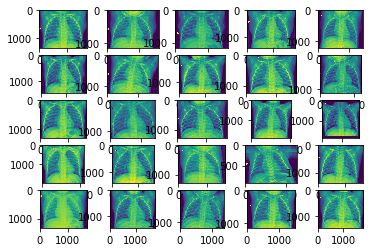

In [72]:
#  plot some examples
# box size for cropping

fig, ax = plt.subplots(5,5)

for axes in ax.reshape(-1):    
    im_ind = np.random.choice(im_pulmao_NORMAL)
    #print(im_ind)
    im = mpimg.imread(pulmao_NORMAL+im_ind)
    
    
    axes.imshow(im)


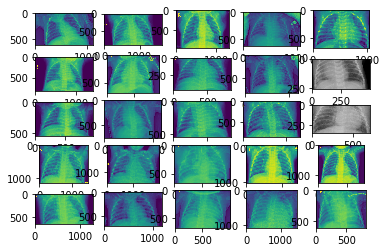

In [73]:

fig, ax = plt.subplots(5,5)

for axes in ax.reshape(-1):   
    im_ind = np.random.choice(im_pulmao_PNEUMONIA)
    im = mpimg.imread(pulmao_PNEUMONIA+im_ind)
    
    axes.imshow(im) 

In [74]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [75]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [76]:
# Pré-processamento das imagens de treino e validação
dataset_treino = '/home/rafael/Downloads/chest-xray-pneumonia/xray/train/'
dataset_validation = '/home/rafael/Downloads/chest-xray-pneumonia/xray/val/'
dataset_test = '/home/rafael/Downloads/chest-xray-pneumonia/xray/test/'

training_set = train_datagen.flow_from_directory(dataset_treino,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory(dataset_validation,
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')
test_set = test_datagen.flow_from_directory(dataset_test,
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [83]:
historico = classifier.fit_generator(training_set,
                         steps_per_epoch = 5216,
                         epochs = 5,
                         validation_data = validation_set,
                         validation_steps = 16)

Epoch 1/5
5216/5216 [==============================] - 2563s 491ms/step - loss: 0.0973 - accuracy: 0.9630 - val_loss: 0.1410 - val_accuracy: 1.0000
Epoch 2/5
5216/5216 [==============================] - 2480s 475ms/step - loss: 0.0587 - accuracy: 0.9783 - val_loss: 0.1597 - val_accuracy: 0.8750
Epoch 3/5
5216/5216 [==============================] - 2447s 469ms/step - loss: 0.0396 - accuracy: 0.9858 - val_loss: 0.3515 - val_accuracy: 0.7500
Epoch 4/5
5216/5216 [==============================] - 2509s 481ms/step - loss: 0.0275 - accuracy: 0.9899 - val_loss: 0.8555 - val_accuracy: 0.8125
Epoch 5/5
5216/5216 [==============================] - 2551s 489ms/step - loss: 0.0202 - accuracy: 0.9928 - val_loss: 0.1961 - val_accuracy: 0.9375


In [84]:
local = '/home/rafael/Downloads/chest-xray-pneumonia/'
classifier.save(local+'modelo.h5')

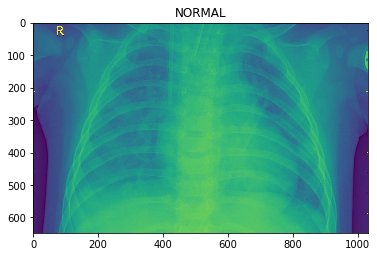

In [85]:
n = 0
test = pulmao_test_NORMAL+im_pulmao_test_NORMAL[n]
test2 = pulmao_test_PNEUMONIA+im_pulmao_test_PNEUMONIA[n]

test_image = image.load_img(test, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
    
if result[0][0] == 1:
    prediction = 'BAD'
else:
    prediction = 'NORMAL'    
    
im = mpimg.imread(test2)
plt.title(prediction)
plt.imshow(im)

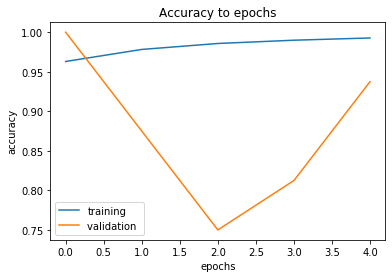

In [86]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Accuracy to epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'validation '])

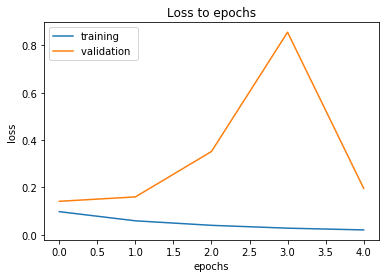

In [87]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss to epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training', 'validation '])

In [88]:
loss_tes, acc_teste = classifier.evaluate(test_set)
print('Perda do teste: ', loss_tes)
print('Acurácia do teste: ', acc_teste)

20/20 [==============================] - 12s 585ms/step
Perda do teste:  0.5977315306663513
Acurácia do teste:  0.9118589758872986


# 2 DN - Classificação de Radiografias do Pulmão casos com COVID-19

In [89]:
plt.close('all')

DATA_PATH = '/home/rafael/Downloads/covid19-radiography-database/train/'
pulmao_NORMAL = '/home/rafael/Downloads/covid19-radiography-database/train/NORMAL/'
pulmao_COVID_19 ='/home/rafael/Downloads/covid19-radiography-database/train/COVID-19/'
pulmao_test_NORMAL = '/home/rafael/Downloads/covid19-radiography-database/test/NORMAL/'
pulmao_test_COVID_19 ='/home/rafael/Downloads/covid19-radiography-database/test/COVID-19/'
# select sample to train and test
im_pulmao_NORMAL = os.listdir('//home/rafael/Downloads/covid19-radiography-database/train/NORMAL/')
im_pulmao_COVID_19 = os.listdir('/home/rafael/Downloads/covid19-radiography-database/train/COVID-19/')
im_pulmao_test_NORMAL = os.listdir('/home/rafael/Downloads/covid19-radiography-database/test/NORMAL/')
im_pulmao_test_COVID_19 = os.listdir('/home/rafael/Downloads/covid19-radiography-database/test/COVID-19/')

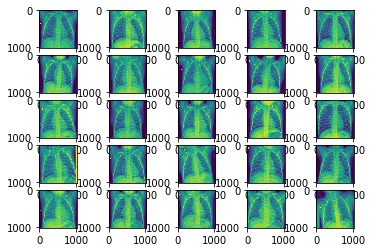

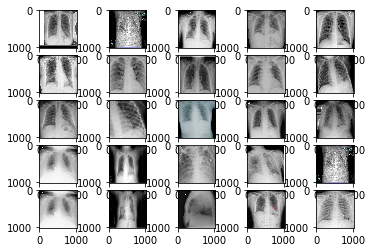

In [90]:
fig, ax = plt.subplots(5,5)

for axes in ax.reshape(-1):    
    im_ind = np.random.choice(im_pulmao_NORMAL)
    #print(im_ind)
    im = mpimg.imread(pulmao_NORMAL+im_ind)
    
    axes.imshow(im)
    
fig, ax = plt.subplots(5,5)

for axes in ax.reshape(-1):   
    im_ind = np.random.choice(im_pulmao_COVID_19)
    im = mpimg.imread(pulmao_COVID_19+im_ind)
    
    axes.imshow(im) 

In [91]:
# Pré-processamento das imagens de treino e validação
dataset_treino = '/home/rafael/Downloads/covid19-radiography-database/train/'
dataset_validation = '/home/rafael/Downloads/covid19-radiography-database/val/'
dataset_test = '/home/rafael/Downloads/covid19-radiography-database/test/'

training_set = train_datagen.flow_from_directory(dataset_treino,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory(dataset_validation,
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')
test_set = test_datagen.flow_from_directory(dataset_test,
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 1103 images belonging to 2 classes.
Found 73 images belonging to 2 classes.
Found 384 images belonging to 2 classes.


In [92]:
historico_covid = classifier.fit_generator(training_set,
                         steps_per_epoch = 1103,
                         epochs = 5,
                         validation_data = validation_set,
                         validation_steps = 73)

Epoch 1/5
1103/1103 [==============================] - 692s 627ms/step - loss: 0.0901 - accuracy: 0.9735 - val_loss: 0.0069 - val_accuracy: 0.9865
Epoch 2/5
1103/1103 [==============================] - 660s 598ms/step - loss: 0.0174 - accuracy: 0.9935 - val_loss: 0.2261 - val_accuracy: 0.9585
Epoch 3/5
1103/1103 [==============================] - 664s 602ms/step - loss: 0.0094 - accuracy: 0.9963 - val_loss: 5.6463e-06 - val_accuracy: 1.0000
Epoch 4/5
1103/1103 [==============================] - 650s 589ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/5
1103/1103 [==============================] - 655s 594ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 5.3954e-04 - val_accuracy: 1.0000


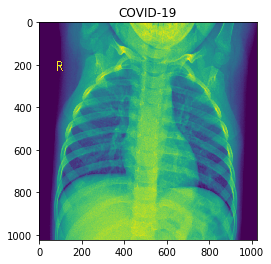

In [100]:
n = 100
test = pulmao_test_NORMAL+im_pulmao_test_NORMAL[n]
test2 = pulmao_test_COVID_19+im_pulmao_test_COVID_19[n]

test_image = image.load_img(test, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
    
if result[0][0] == 1:
    prediction = 'COVID-19'
else:
    prediction = 'NORMAL'    
    
im = mpimg.imread(test2)
plt.title(prediction)
plt.imshow(im)

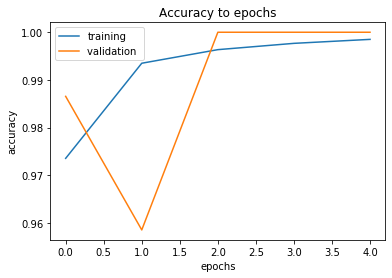

In [101]:
plt.plot(historico_covid.history['accuracy'])
plt.plot(historico_covid.history['val_accuracy'])
plt.title('Accuracy to epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'validation '])

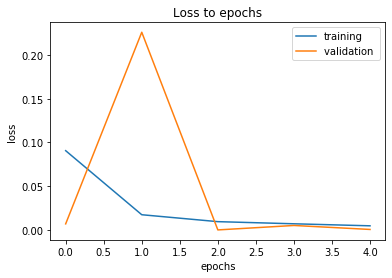

In [102]:
plt.plot(historico_covid.history['loss'])
plt.plot(historico_covid.history['val_loss'])
plt.title('Loss to epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training', 'validation '])

In [103]:
loss_tes, acc_teste = classifier.evaluate(test_set)
print('Perda do teste: ', loss_tes)
print('Acurácia do teste: ', acc_teste)

12/12 [==============================] - 9s 771ms/step
Perda do teste:  11.29133415222168
Acurácia do teste:  0.7161458134651184
